In [1]:
# Carrega Bibliotecas

library(dplyr)
library(ggplot2)
library(daltoolbox)
library(RColorBrewer)
library(GGally)
library(reshape)
library(corrplot)
library(WVPlots)
library(aplpack)
library(gridExtra)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


corrplot 0.92 loaded

Loading required package: wrapr


Attaching package: ‘wrapr’


The following object is masked from ‘package:dplyr’:

    coalesce


Warning message:
“no DISPLAY variable so Tk is not available”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘tidyr’


The following objects are masked from ‘package:wrapr’:

    pack, un

In [2]:
# Carrega Dataset
load("/home/data/malaria/malaria.RData")

# Lista Objetos
ls()

[1] "data"

In [3]:
# Exibe as Colunas
head(data)

,infection.county,home.county,notification.county,qty.parasites,scheme,notification.hr,home.hr,infection.hr,exam.type,exam.result,⋯,exam.month,exam.year,treatment.month,treatment.year,symptom.month,symptom.year,exam.interval,treatment.interval,notification.interval,previous.treatment
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>
1,110001,110001,110001,501100,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,02,2014,02,2014,02,2014,on the same day,on the same day,on the same day,vivax
2,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,12,2014,12,2014,12,2014,on the same day,on the same day,1 to 7 days,vivax
3,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2014,11,2014,11,2014,on the same day,on the same day,on the same day,no
4,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2013,10,2013,10,2013,on the same day,on the same day,1 to 7 days,no
5,110001,110001,110001,3,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2014,10,2014,10,2014,on the same day,on the same day,1 to 7 days,no
6,110001,110001,110001,305500,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2013,11,2013,NA,NA,1 to 7 days,on the same day,NA,no


In [4]:
# Visão Geral dos Dados
summary(data)

 infection.county    home.county       notification.county qty.parasites     
 130260 :  254086   130260 :  341082   120020 : 2367517    Min.   :     0    
 120020 :  195149   120020 :  199012   130260 : 2076083    1st Qu.:    60    
 150070 :  143708   150070 :  138806   110020 : 1018178    Median :   700    
 110020 :  138296   110020 :  137645   120033 :  881393    Mean   :  3335    
 130380 :   98734   130380 :   96825   130040 :  682656    3rd Qu.:  2500    
 (Other): 2064572   (Other): 2053342   150070 :  617060    Max.   :999999    
 NA's   :20029432   NA's   :19957265   (Other):15281090    NA's   :22062051  
     scheme                                notification.hr   
 1      : 2192733   MANAUS ENTORNO E ALTO RIO NEGRO:4245518  
 99     :  208923   JURUA E TARAUACA/ENVIRA        :3940345  
 5      :   95601   MADEIRA-MAMORE                 :1318581  
 2      :   47841   REGIONAL JURUA                 :1256899  
 11     :   46571   MARAJO II                      :1234896  
 (Ot

In [5]:
# Amostra dos Valores de Cada Coluna
glimpse(data)

Rows: 22,923,977
Columns: 40
$ infection.county      <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ home.county           <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ notification.county   <fct> 110001, 110001, 110001, 110001, 110001, 110001, …
$ qty.parasites         <dbl> 501100, NA, NA, NA, 3, 305500, NA, NA, NA, 50110…
$ scheme                <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 99, 1, 1, 1,…
$ notification.hr       <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ home.hr               <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ infection.hr          <fct> ZONA DA MATA, ZONA DA MATA, ZONA DA MATA, ZONA D…
$ exam.type             <fct> thick and thin blood smears, thick and thin bloo…
$ exam.result           <fct> vivax, vivax, vivax, vivax, vivax, vivax, vivax,…
$ gender                <fct> male, male, male, male, female, male, female, ma…
$ hemiparasite          <fct> negative, not researched, negative, not research…
$ symptom  

In [6]:
# número de linhas e colunas
print(paste("Número de Linhas:",nrow(data)))
print(paste("Número de Colunas:",ncol(data)))

[1] "Número de Linhas: 22923977"
[1] "Número de Colunas: 40"


In [7]:
# Separado algumas colunas para estudo
ref <- data %>% select(notification.county,notification.year,qty.parasites,exam.result,gender,home.state,age,previous.treatment)

#retira valores nulos, os NA 
sr <- na.omit(ref)

# cria uma amostra 
# usei essa técnica para rodar os plots de forma mais rápida afim de ajustá-los
#depois foi comentado posteriormente para usar os dados originais

#sr <- sample_n(ref, 1000)
#pos <- sr[sr$exam.result != negative, ]




In [8]:
# Verifica os tipos de resultados

sr %>% count(sr$exam.result)
ref %>% count(ref$exam.result)

# A tentativa de tirar valores nulos reduziu demais os registros conforme comparação abaixo

sr$exam.result,n
<fct>,<int>
negative,6
falciparum,51142
F+FG,8310
vivax,457145
F+V,4471
V+FG,1216
FG,2017
malariae,247
F+M,144


ref$exam.result,n
<fct>,<int>
negative,20186404
falciparum,262440
F+FG,48518
vivax,2365980
F+V,17083
V+FG,8159
FG,11596
malariae,686
F+M,403


In [9]:
#Separa tabelas para Matriz
split <- ref %>% select (gender,age,exam.result)

#Aplicado filtro aos valores mais usados para o gráfico pois os demais campos eram muito irrelevantes para aparecer no gráfico <- split %>% filter(exam.result == 'vivax' | exam.result == 'falciparum')
#também retira os resultados negativos

split <- split %>% filter (exam.result=="vivax" | exam.result=="falciparum")



Warning message in check_and_set_ggpairs_defaults("diag", diag, continuous = "densityDiag", :
“Changing diag$continuous from 'points' to 'pointsDiag'”
Warning message:
“Removed 6 rows containing non-finite values (`stat_g_gally_count()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_g_gally_count()`).”
Warning message:
“Removed 34 rows containing non-finite values (`stat_g_gally_count()`).”


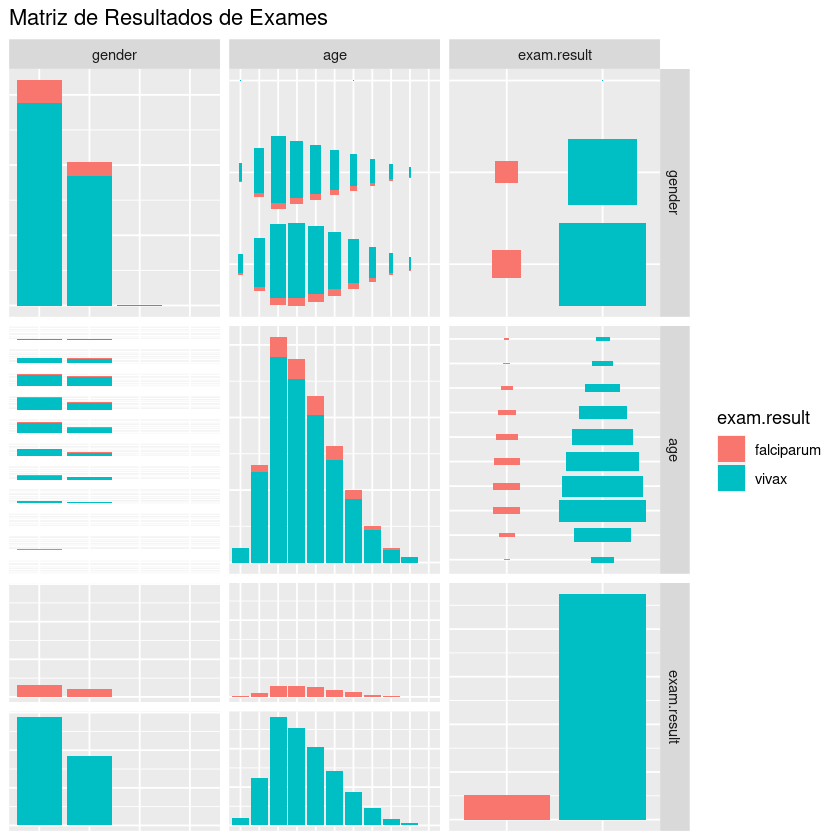

In [10]:
#Criando a Matriz de Dispersão

# a função pairs tem poucas opções de edição, optado por usar o ggpairs
#pairs(sr[, c(1, 1:4)])
#pairs(sr[, c(1, 5:8)])


ggpairs(
    split,
    #columns=c(4,5,7),
    cardinality_threshold=NULL,
    aes(color = exam.result),
    upper = list(continuous = "points",combo = "box_no_facet",discrete = "count", na = "na"),
    lower = list(continuous = "points",combo = "facethist", discrete = "facetbar", na = "na"),
    diag = list(continuous = "points",discrete = "barDiag",na = "naDiag"),
    title = "Matriz de Resultados de Exames",
    legend = 1,
    axisLabels = "none"
)

In [11]:
# selecionar coluna referente as 5 maiores regiões com maior incidência de casos

regiao <- select(data,home.state)
regiao <- na.omit(regiao) 
regiao <- regiao %>% group_by(home.state) %>% count(home.state, sort=TRUE)
regiao <- head(regiao,n=5)


[1] "Os 5 estados com maior incidência de casos"


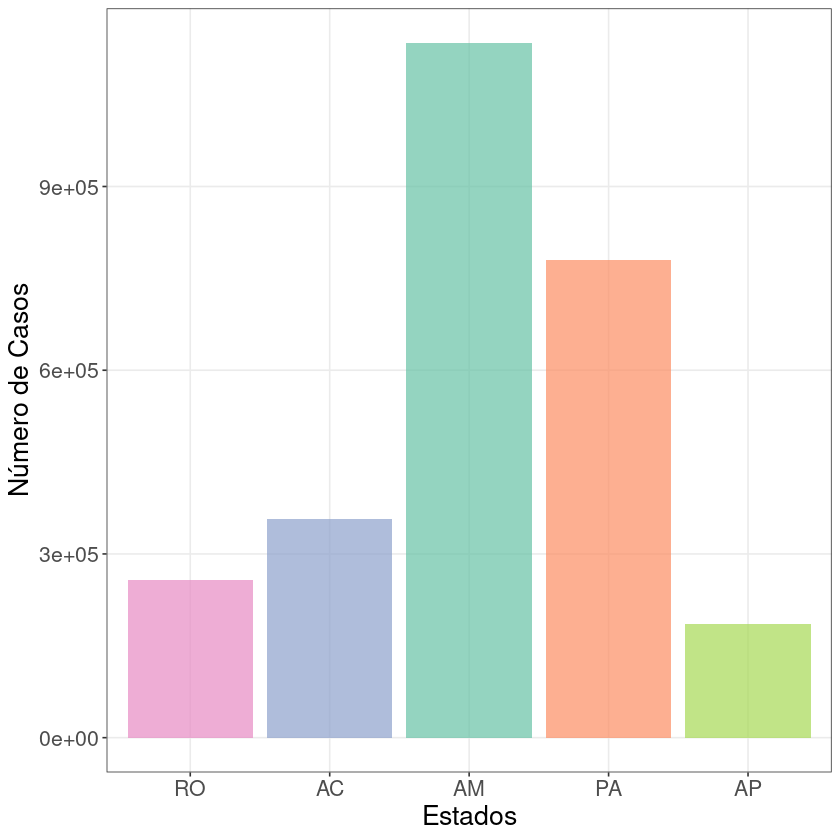

In [12]:
#Configuração do Plot Bar

colors <- brewer.pal(5, 'Set2')
# setting the font size for all charts
font <- theme(text = element_text(size=16))

grf <- plot_bar(regiao, 
                colors=colors[1:5], 
                alpha=0.7,
                label_x = "Estados", 
                label_y = "Número de Casos") + font

#plot_bar não deixa colocar title :(
print("Os 5 estados com maior incidência de casos")

plot(grf)


In [13]:
# Incidência de Casos Positivos e Negativos
# Pré-processamento dos dados

result <- select(data, exam.result, exam.year, exam.month) # seleciona colunas
result <- result %>% unite(data, c(exam.year,exam.month)) # concatena datas
#result <- na.omit(result) # retira valores NA
result <- result %>% mutate(exam.result = ifelse(exam.result == 'negative','negative','positive')) # simplifica resultados
#result <- result %>% group_by(exam.result,data) %>% count(exam.result) # agrupa por ano e mes
#result %>% group_by(exam.result) %>% count(exam.result)
result$data <- ym(result$data)
#negative <- result %>% filter(n>1000 & n<10000 & exam.result == "negative")
#positive <- result %>% filter(n>1000 & n<50000 & exam.result == "positive")

ERROR: Error in ym(result$data): could not find function "ym"


In [ ]:
# Incidência de Casos Positivos e Negativos
# Plotando gráfico 
print("Grafico de Casos Negativos")
ggplot(data=negative, 
       aes(x=data, y=n, group=1)
      ) +
  geom_step()+
  geom_point()


In [ ]:
print("Grafico de Casos Positivos")
ggplot(data=positive, 
       aes(x=data, y=n, group=1)
      ) +
  geom_step()+
  geom_point()


In [ ]:
args(ggplot)

In [ ]:
library(lubridate)
